In [32]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install sklearn
!pip install scipy
!pip install seaborn
%matplotlib inline
import matplotlib.pyplot as plt

  Using cached seaborn-0.7.1.tar.gz
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /Users/alejandrorodriguez/Library/Caches/pip/wheels/cb/c8/67/83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn


In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
full_data= [train, test]

## Pclass##

In [4]:
print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


## Sex##

In [5]:
print(train[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


## SibSp and Parch##

In [6]:
for dataset in full_data:
    #print(dataset["SibSp"] + dataset["Parch"])
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
print(train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=False).mean().sort_values(by = "Survived", ascending=False))

   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


In [7]:
for dataset in full_data:
    dataset["IsAlone"] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print(train[["IsAlone", "Survived"]].groupby(["IsAlone"], as_index=False).mean().sort_values(by = "Survived", ascending=False))

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


## Embarked ##

In [8]:
train["Embarked"].value_counts(ascending=False, dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Fill na's with the most occurrent value

In [9]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
#print(train["Embarked"].value_counts(ascending=False, dropna=False))
print(train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean().sort_values(by = "Survived", ascending=False))

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


## Fare ##

In [10]:
train[train["Fare"]== 0.0]["Fare"]

179    0.0
263    0.0
271    0.0
277    0.0
302    0.0
413    0.0
466    0.0
481    0.0
597    0.0
633    0.0
674    0.0
732    0.0
806    0.0
815    0.0
822    0.0
Name: Fare, dtype: float64

In [11]:
for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].fillna(train["Fare"].median())
train["CategoricalFare"] = pd.qcut(train['Fare'],4)
print(train[["CategoricalFare", "Survived"]].groupby(["CategoricalFare"], as_index=False).mean().sort_values(by = "Survived", ascending=False))    

   CategoricalFare  Survived
3  (31.0, 512.329]  0.581081
2   (14.454, 31.0]  0.454955
1   (7.91, 14.454]  0.303571
0   (-0.001, 7.91]  0.197309


## Age##

In [12]:
age_null_count = dataset["Age"].isnull().sum()#train["Age"].value_counts(ascending=False, dropna=False)
age_null_count

86

In [13]:
for dataset in full_data:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())
train

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.534483
1   (16.0, 32.0]  0.351598
2   (32.0, 48.0]  0.369650
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


/Users/alejandrorodriguez/DataScience/SolucionTitanic/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,CategoricalFare,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,2,0,"(-0.001, 7.91]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,0,"(31.0, 512.329]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,"(7.91, 14.454]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2,0,"(31.0, 512.329]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,1,"(7.91, 14.454]","(32.0, 48.0]"
5,6,0,3,"Moran, Mr. James",male,36,0,0,330877,8.4583,NaN,Q,1,1,"(7.91, 14.454]","(32.0, 48.0]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1,1,"(31.0, 512.329]","(48.0, 64.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,5,0,"(14.454, 31.0]","(-0.08, 16.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,3,0,"(7.91, 14.454]","(16.0, 32.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,2,0,"(14.454, 31.0]","(-0.08, 16.0]"


## Data Cleaning##

In [14]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset.Sex.map({'female':0,'male':1}).astype(int)
    
    #Mapping Embarked
    dataset["Embarked"] = dataset.Embarked.map({'S': 0, 'C': 1, 'Q': 2})
    

    
    #Mapping Fare
    dataset.loc[dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset.Fare > 7.91) & (dataset.Fare <= 14.454),"Fare"] = 1
    dataset.loc[(dataset.Fare > 14.454) & (dataset.Fare <= 31),"Fare"] = 2
    dataset.loc[dataset.Fare > 31,"Fare"] = 3
    dataset.Fare = dataset.Fare.astype(int)

        # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
    
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Parch', 'FamilySize']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))

train = train.values
test  = test.values



   Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone
0         0       3    1    1     0         0        0
1         1       1    0    2     3         1        0
2         1       3    0    1     1         0        1
3         1       1    0    2     3         0        0
4         0       3    1    2     1         0        1
5         0       3    1    2     1         2        1
6         0       1    1    3     3         0        1
7         0       3    1    0     2         0        0
8         1       3    0    1     1         0        0
9         1       2    0    0     2         1        0


array([[0, 3, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 3, 1, 0],
       [1, 3, 0, ..., 1, 0, 1],
       ..., 
       [0, 3, 0, ..., 2, 0, 0],
       [1, 1, 1, ..., 2, 1, 1],
       [0, 3, 1, ..., 0, 2, 1]])

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LinearRegression

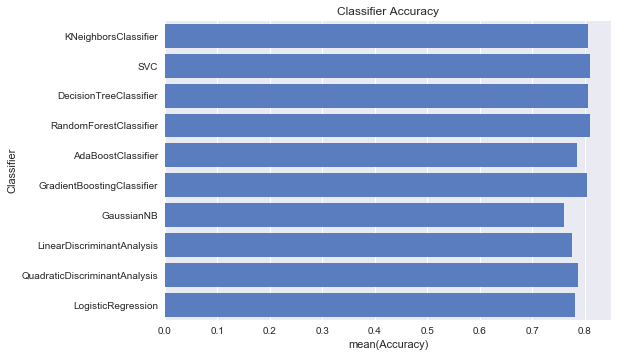

In [34]:


classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()#,
    #LinearRegression()
]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")